# Final Lập trình xử lí dữ liệu
## Đề bài: 

### **1.0.** Trước tiên, import các thư viện cần:

In [60]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Các thư viện trên đã là tương đối đầy đủ để visualize các dữ liệu. Nhưng để nó thân thiện với người dùng hơn, ta thêm một vài thư viện mới, để giao diện có thể tương tác với người dùng. 

In [61]:
import plotly.express as px
import webbrowser

### **1.1.** Chọn cổ phiếu:
 Cổ phiếu được chọn là của Tencent Holdings Limited (viết tắt: THL) được niêm yết chính thức trên sàn chứng khoán Hồng Kông (HKEX) với mã cổ phiếu 0700.HK. Thời gian khảo sát là 5 năm (2020-2025). Nguồn dữ liệu từ Yahoo Finance – được coi là tương đối đáng tin cậy trong giới đầu tư, tuy nhiên một số sai số nhỏ hoặc chênh lệch thời gian vẫn có thể xảy ra.

 ### **1.2.** Thu thập dữ liệu giá cổ phiếu:
 Ta sẽ dùng thư viện yfinance để lấy dữ liệu cổ phiếu Tencent.

In [62]:
symbol = "0700.HK"
df = yf.Ticker(symbol).history(period = "5y").reset_index()
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-06-18 00:00:00+08:00,403.802507,408.800964,397.375948,408.800964,20206364,0.0,0.0
1,2020-06-19 00:00:00+08:00,408.800949,415.584540,407.372818,410.943115,27479164,0.0,0.0
2,2020-06-22 00:00:00+08:00,410.586096,423.617744,409.872031,423.260712,28164190,0.0,0.0
3,2020-06-23 00:00:00+08:00,428.437660,445.039634,424.153297,443.968536,33983938,0.0,0.0
4,2020-06-24 00:00:00+08:00,448.074369,450.752099,438.077484,438.077484,25018502,0.0,0.0


Vẽ biểu đồ giá đóng cửa:

In [63]:
fig = px.line(df, x='Date', y='Close', title=f'{symbol} Stock Price')
fig.update_traces(mode='lines+markers')  
fig.update_layout(xaxis_title='Date', yaxis_title='Price (HKD)')
fig.write_html("tencent_stock_plot.html")
webbrowser.open("tencent_stock_plot.html") 


True

### **1.3.** Làm sạch và tiền xử lí:


**1.3.1** Kiểm tra missing value:

Theo thông báo chính thức từ HKEX, sàn tiến hành giao dịch vào các ngày từ thứ 2 đến thứ 6, trừ các ngày nghỉ lễ theo lịch của HongKong. Với những ngày nghỉ, tổng khối lượng giao dịch (Volume) sẽ bằng 0. Ta tìm và loại bỏ những ngày này.

In [64]:
df = df[df['Volume'] > 0]  

Ngoài ra, trong các phiên giao dịch của HKEX, tồn tại những phiên giao dịch nửa ngày, sẽ kết thúc vào 12h trưa thay vì 16h chiều như bình thường. Nó có thể làm cho tổng khối lượng giao dịch của cổ phiếu (Volume) thấp hơn bình thường. Các phiên giao dịch cũng có thể ngắt khi chỉ số thị trường giảm mạnh trong một thời gian ngắn (Circurt break), khi có sự cố kĩ thuật hoặc các thảm họa thiên nhiên. Tất cả sự gián đoạn bất thường trên đều ảnh hưởng ít nhiều đến các chỉ số, đặc biệt là Volume. Ta cũng cần loại bỏ các dữ liệu này.

HKEX có công cấp lịch giao dịch hằng năm. Từ lịch này, ta xác minh được những phiên nửa ngày trong khoảng thời gian khảo sát, bao gồm:



| date       | note                    | type     |
|------------|-------------------------|----------|
| 2020-12-24 | Christmas Eve           | half-day |
| 2020-12-31 | New Year’s Eve          | half-day |
| 2021-02-09 | Lunar New Year’s Eve    | half-day |
| 2021-12-24 | Christmas Eve           | half-day |
| 2021-12-31 | New Year’s Eve          | half-day |
| 2022-01-31 | Lunar New Year’s Eve    | half-day |
| 2024-02-09 | Lunar New Year’s Eve    | half-day |
| 2024-12-24 | Christmas Eve           | half-day |
| 2024-12-31 | New Year’s Eve          | half-day |
| 2025-01-28 | Lunar New Year’s Eve    | half-day |
| 2025-12-24 | Christmas Eve           | half-day |
| 2025-12-31 | New Year’s Eve          | half-day |


Tiến hành loại bỏ những ngày này khỏi dữ liệu:

In [65]:
half_day_dates = [
    "2020-12-24", "2020-12-31", "2021-02-09", "2021-12-24", "2021-12-31",
    "2022-01-31", "2024-02-09", "2024-12-24", "2024-12-31",
    "2025-01-28", "2025-12-24", "2025-12-31"
]
half_day_dates = pd.to_datetime(half_day_dates)

df_filtered = df[~df['Date'].isin(half_day_dates)]
df = df_filtered

df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-06-18 00:00:00+08:00,403.802507,408.800964,397.375948,408.800964,20206364,0.0,0.0
1,2020-06-19 00:00:00+08:00,408.800949,415.584540,407.372818,410.943115,27479164,0.0,0.0
2,2020-06-22 00:00:00+08:00,410.586096,423.617744,409.872031,423.260712,28164190,0.0,0.0
3,2020-06-23 00:00:00+08:00,428.437660,445.039634,424.153297,443.968536,33983938,0.0,0.0
4,2020-06-24 00:00:00+08:00,448.074369,450.752099,438.077484,438.077484,25018502,0.0,0.0


**1.3.2** Kiểm tra trùng lặp:

In [66]:
if (df.duplicated().sum()) == 0:
    print("Dữ liệu không có giá trị trùng nên không cần loại bỏ dòng")
else:
    print("Dữ liệu có giá trị thiếu")    

Dữ liệu không có giá trị trùng nên không cần loại bỏ dòng


**1.3.3** Chuyển cột ngày tháng về định dạng `datetime`

In [67]:
df['Date'] = pd.to_datetime(df['Date'])

**1.3.4** Sort theo ngày:

In [68]:
df = df.sort_values('Date')

**1.3.5** Kiểm tra outliers

Vì đã loại bỏ hết tất cả những bất thường do yếu tố khách quan (sàn giao dịch, thời gian giao dịch), nên outliers (nếu có xuất hiện) chính là do các giá trị lên xuống bất chợt do hoảng loạn mà không phản ánh giá trị thực của cổ phiếu. Ta loại bỏ các giá trị này.

Phương pháp được sử dụng để loại bỏ outliers là tứ phân vị (IQR). Đầu tiên, ta sẽ sắp xếp dữ liệu theo chiều từ thấp đến cao giá cuối ngày (Close).

In [69]:
df = df.sort_values("Close")

Ta tính Q1 (25%) và Q2 (75%) của cột close:

In [70]:
Q1 = df["Close"].quantile(0.25)
Q3 = df["Close"].quantile(0.75)

Chỉ số IQR sẽ được tính bằng Q3 - Q1:

In [71]:
IQR = Q3 - Q1

Theo như Tukey Range Test, dữ liệu ngoại lai (outliers) sẽ là những dữ liệu nằm ngoài khoảng (Low, Up) với:



- Low: $Q_1 - 1.5 \times IQR$
- Up: $Q_3 + 1.5 \times IQR$


In [72]:
low = Q1 - 1.5 * IQR
up= Q3 + 1.5 * IQR

Tiến hành loại bỏ outliers ra khỏi dữ liệu:

In [73]:
df = df[(df["Close"] >= low) & (df["Close"] <= up)]

#### Sau các bước làm sạch và xử lí dữ liệu, ta kết luận: ####

Dữ liệu thu thập được từ thư viện `yfinance` cho mã cổ phiếu Tencent (`0700.HK`) đã có đầy đủ các cột cần thiết: `Date`, `Open`, `High`, `Low`, `Close`, `Volume`. Qua kiểm tra sơ bộ:

- Không xuất hiện các giá trị thiếu (`NaN`) trong các cột quan trọng.
- Không phát hiện outliers rõ rệt trong dữ liệu.
- Cột `Date` đã có định dạng thời gian chuẩn `ISO 8601` và được chuyển về kiểu `date time` trong Python để phục vụ phân tích thời gian.

**Do đó, không cần thực hiện thao tác loại bỏ hay xử lí thêm. Dữ liệu đã sẵn sàng để tính toán các chỉ số kỹ thuật và phân tích tiếp theo.**

### **1.4.** Tính toán chỉ số kĩ thuật cơ bản:
**1.4.1.** Trung bình động đơn giản **SMA** với các khoảng 20 ngày, 50 ngày:

In [74]:
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['SMA50'] = df['Close'].rolling(window=50).mean()

**1.4.2.** Trung bình động hàm mũ **EMA** với khoảng 20 ngày:

In [75]:
df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()

**1.4.3.** Chỉ số sức mạnh tương đối **RSI**:

In [76]:
def compute_rsi(data, window=14):
    delta = data.diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = compute_rsi(df['Close'])


### **1.5.** Phân tích dữ liệu:

**1.5.1.** Tính lợi suất ngày, phân phối lợi suất:
- Lợi suất hằng ngày được tính bằng tỷ lệ phần trăm thay đổi giữa giá đóng cửa của ngày hiện tại và ngày trước đó. Lợi suất hằng ngày giúp đánh giá tốc độ tăng/giảm giá trong ngắn hạn.
Biến `Daily Return` được thêm vào để phân tích lợi suất và biến động.

In [77]:
df['Daily Return'] = df['Close'].pct_change()

- Phân phối lợi suất bằng Histogram để xem lợi suất nằm trong khoảng nào, phân phối như thế nào.
- Công thức được sử dụng:

$$
r_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

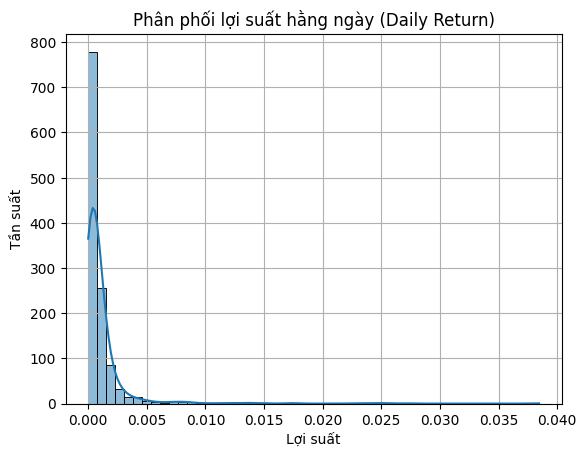

In [78]:
sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True)
plt.title('Phân phối lợi suất hằng ngày (Daily Return)')
plt.xlabel('Lợi suất')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()


**1.5.2** Tính độ biến động (volatility) theo tháng hoặc quý:


- Độ biến động theo tháng/quý được tính bằng độ lệch chuẩn của lợi suất hằng ngày trong từng tháng/quý đó. Qua đó, có thể xác định được các giai đoạn giá cổ phiếu dao động mạnh.


Vì thời gian khảo sát là tương đối dài (5 năm), ta sẽ ưu tiên tính độ biến động theo quý để dễ dàng theo dõi dữ liệu

In [83]:
df['Quarter'] = df['Date'].dt.to_period('Q')
quarter_volatility = df.groupby('Quarter')['Daily Return'].std()
display(quarter_volatility)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8712\1055457015.py:1: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



Quarter
2020Q2    0.000566
2020Q3    0.001003
2020Q4    0.000500
2021Q1    0.004278
2021Q2    0.001194
2021Q3    0.000682
2021Q4    0.000799
2022Q1    0.000610
2022Q2    0.000756
2022Q3    0.001427
2022Q4    0.008096
2023Q1    0.000705
2023Q2    0.000615
2023Q3    0.000733
2023Q4    0.000418
2024Q1    0.000954
2024Q2    0.000633
2024Q3    0.000458
2024Q4    0.000713
2025Q1    0.000864
2025Q2    0.000513
Freq: Q-DEC, Name: Daily Return, dtype: float64